In [5]:
import numpy as np
import torch

import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import pandas as pd

C:\Users\Admin\AppData\Local\Temp\ipykernel_3984\1848518675.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [9]:
data = pd.read_csv("../FFN/mnist_train_small.csv", header=None)

# don't need labels
labels = data.values[:8, 0]
data = data.values[:8, 1:]

# normalize the data to a range of [0 1]
dataNorm = data/np.max(data)

# reshape to 2D
dataNorm = dataNorm.reshape(dataNorm.shape[0], 1, 28, 28)

# dataNorm.shape[0]  # = number of samples (e.g., 60000 for MNIST training set)
# 1                  # = number of channels (1 for grayscale images, 3 for RGB)
# 28                 # = height of the image in pixels
# 28                 # = width of the image in pixels

# check sizes
print(dataNorm.shape)
print(labels.shape)

# convert to tensor
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

(8, 1, 28, 28)
(8,)


In [10]:
class customDataset(Dataset):
  def __init__(self, tensors, transform=None):

    # check that sizes of data and labels match
    assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"
    
    # assign inputs
    self.tensors   = tensors
    self.transform = transform

  # what to do when someone wants and item from the dataset
  def __getitem__(self, index): 

    # return transformed version of x if there are transforms
    if self.transform:
      x = self.transform(self.tensors[0][index])
    else:
      x = self.tensors[0][index]

    # and return label
    y = self.tensors[1][index]

    return x,y # return the (data,label) tuple

  def __len__(self):
    return self.tensors[0].size(0)

In [11]:
# data -> dataset -> dataloader

# create a list of transforms to apply to the image
imgtrans = T.Compose([
    T.ToPILImage(), # convert from numpy or tensor to PILImage because a lot of transformations only work on PILImage
    T.RandomVerticalFlip(p = .5), # probab of image being vertically flipped is 50% ( p = .5)
    T.ToTensor()
])

In [12]:
# now convert the data into datasets and then the dataloaders

# convert into PyTorch datasets
# Note: we have no test data here, but you should apply same transformations to the test data
train_data = customDataset((dataT, labelsT), imgtrans)

# translate into dataLoader objects
dataLoaded = DataLoader(train_data, batch_size = 8, shuffle = False)

In [13]:
type(train_data)

__main__.customDataset

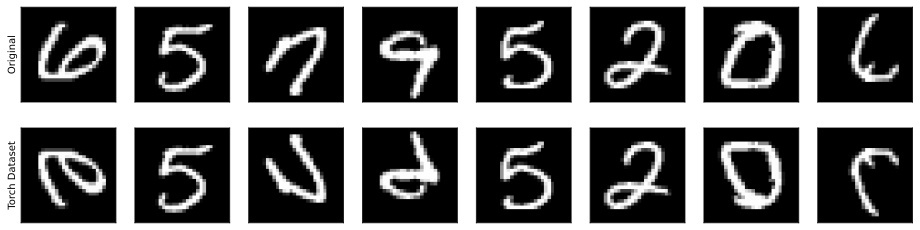

In [15]:
# import data from the dataloader, just like during training
X, y = next(iter(dataLoaded))

# create a figure
fig, axs = plt.subplots(2, 8, figsize = (16, 4))

for i in range(8):

    # draw images
    axs[0, i].imshow(dataT[i, 0, :, :].detach(), cmap = 'gray')
    axs[1, i].imshow(X[i, 0, :, :].detach(), cmap = 'gray')

    for row in range(2):
        axs[row, i].set_xticks([])
        axs[row, i].set_yticks([])

# row labels
axs[0, 0].set_ylabel("Original")
axs[1, 0].set_ylabel("Torch Dataset")

plt.show()

In [16]:
# Note: we haven't atually increased the amount of data
len(train_data)

8